In [45]:
from __future__ import division

import numpy as np
import os
from glob import glob
import scipy

from PIL import Image
from copy import deepcopy

from sklearn import linear_model, datasets, neighbors
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm

%matplotlib inline
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import torch
import torchvision.models as models
import torch.nn as nn
import torchvision.transforms as transforms
import torch.nn.functional as F
from torch.autograd import Variable

import pandas as pd
import pickle

VGG_SIZE_X = 224
VGG_SIZE_Y = 224
VGG_SIZE_Z = 3

import sys
sys.path.insert(0, '/home/rslee/sketchfeat/sketches')


import embedding as emb
reload(emb)
from embedding import *


In [3]:
partial = pd.read_csv('/home/rslee/sketchfeat/0110171_partial.csv')

In [10]:
# average over a subject
path_to_psketch = '/home/rslee/partial_sketches'
subject_names = subject_folders = [x[1] for x in os.walk(path_to_psketch)][0]

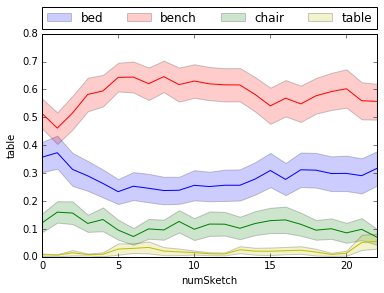

In [52]:
sns.tsplot(data = partial[], time = 'numSketch', unit = 'trial', value = 'bed', color = 'b')
sns.tsplot(data = partial, time = 'numSketch', unit = 'trial', value = 'bench', color = 'r')
sns.tsplot(data = partial, time = 'numSketch', unit = 'trial', value = 'chair', color = 'g')
sns.tsplot(data = partial, time = 'numSketch', unit = 'trial', value = 'table', color = 'y')

plt.legend(['bed', 'bench', 'chair', 'table'], bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
                   ncol=4, mode="expand", borderaxespad=0.)

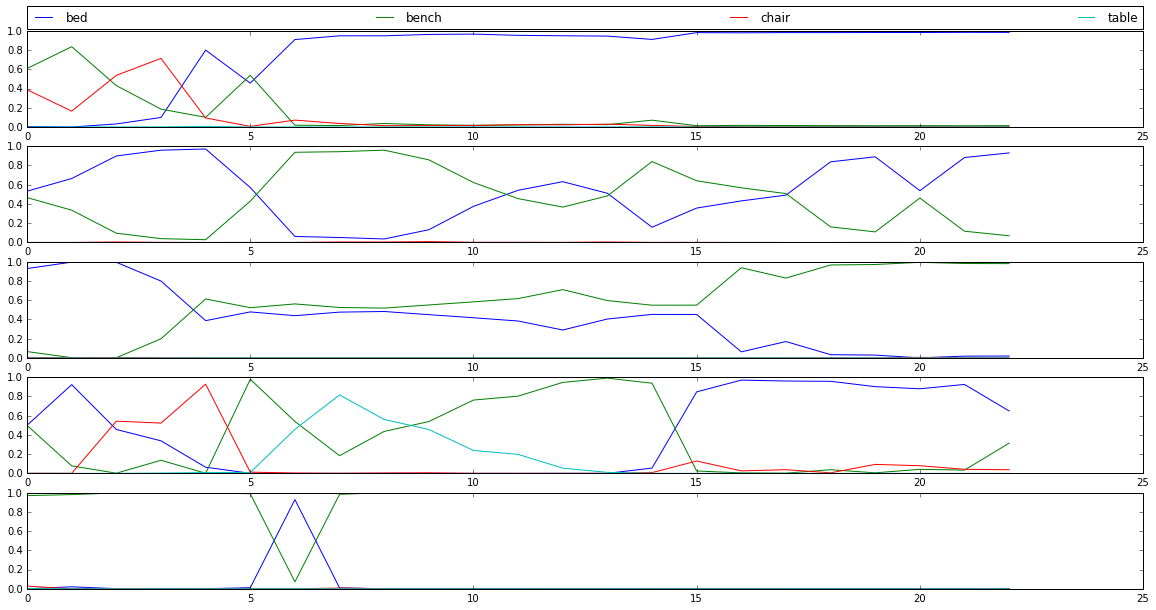

In [40]:
    fig = plt.figure(figsize = (20,10))

    trials = np.unique(partial['trial'])
    for i, t in enumerate(trials[:5]):
        plt.subplot(5, 1, i + 1)
        plt.plot(np.arange(23), partial.loc[partial['trial'] == t, ['bed', 'bench', 'chair', 'table']])
        if i == 0: 
            plt.legend(['bed', 'bench', 'chair', 'table'], bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
                   ncol=4, mode="expand", borderaxespad=0.)

In [41]:
partial

,Unnamed: 0,index,wID,viewpoint,trial,trialDuration,target,competitor,numSketch,bed,bench,chair,table
0,0,0,0110171_neurosketch,38,320,39.006235,bed,bench,0,0.004094,0.608175,0.387729,1.566013e-06
1,1,0,0110171_neurosketch,38,320,39.006235,bed,bench,1,0.000065,0.834896,0.164997,4.198505e-05
2,2,0,0110171_neurosketch,38,320,39.006235,bed,bench,2,0.032009,0.430356,0.536952,6.832995e-04
3,3,0,0110171_neurosketch,38,320,39.006235,bed,bench,3,0.099233,0.185930,0.713407,1.430289e-03
4,4,0,0110171_neurosketch,38,320,39.006235,bed,bench,4,0.799228,0.100315,0.094142,6.315228e-03
5,5,0,0110171_neurosketch,38,320,39.006235,bed,bench,5,0.456203,0.537006,0.006632,1.586249e-04
6,6,0,0110171_neurosketch,38,320,39.006235,bed,bench,6,0.909034,0.018777,0.071655,5.339179e-04
7,7,0,0110171_neurosketch,38,320,39.006235,bed,bench,7,0.947898,0.015077,0.036740,2.860253e-04
8,8,0,0110171_neurosketch,38,320,39.006235,bed,bench,8,0.948066,0.036762,0.014152,1.018958e-03
9,9,0,0110171_neurosketch,38,320,39.006235,bed,bench,9,0.962174,0.022716,0.014407,7.027543e-04
